In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [5]:
data1 = data.drop(['Unnamed: 0',"Temp C"], axis =1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


data1.info()

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [8]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [9]:
data1[data1.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [10]:
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [11]:
data1.rename({'Solar.R':'Solar'},axis=1, inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


IMPUTE THE MISSING VALUES

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar    151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [14]:
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

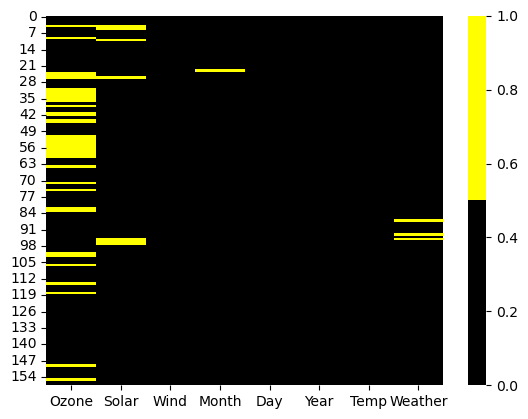

In [15]:
cols = data1.columns
colors = ['black', 'yellow']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True) 

In [16]:
median_Ozone = data1["Ozone"].median()
mean_Ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_Ozone)
print("Mean of Ozone: ", mean_Ozone)

Median of Ozone:  30.5
Mean of Ozone:  41.583333333333336


In [17]:
data1['Ozone'] = data1['Ozone'].fillna(median_Ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [18]:
median_Solar = data1["Solar"].median()
mean_Solar = data1["Solar"].mean()
print("Median of Solar: ", median_Solar)
print("Mean of Solar: ", mean_Solar)

Median of Solar:  197.0
Mean of Solar:  185.40397350993376


In [19]:
data1['Solar'] = data1['Solar'].fillna(mean_Solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [20]:
#print the data1 5 rows
data1.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,S
1,36.0,118.000000,8.0,5.0,2,2010,72,C
2,12.0,149.000000,12.6,5.0,3,2010,74,PS
3,18.0,313.000000,11.5,5.0,4,2010,62,S
4,30.5,185.403974,14.3,5.0,5,2010,56,S


In [21]:
#find the mode values of categorical columns
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     59
C     49
PS    47
Name: count, dtype: int64
S


In [22]:
data1["weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
weather    0
dtype: int64

In [23]:
mode_month = data1["Month"].mode()[0]
data1["Month"] = data1["Month"].fillna(mode_month)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
weather    0
dtype: int64

In [24]:
data1.tail()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,weather
153,41.0,190.0,7.4,5.0,1,2010,67,C,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS,PS
155,30.5,145.0,13.2,9.0,27,2010,77,S,S
156,14.0,191.0,14.3,9.0,28,2010,75,S,S
157,18.0,131.0,8.0,9.0,29,2010,76,C,C


In [25]:
#reset the index column
data1.reset_index(drop=True)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,weather
0,41.0,190.000000,7.4,5.0,1,2010,67,S,S
1,36.0,118.000000,8.0,5.0,2,2010,72,C,C
2,12.0,149.000000,12.6,5.0,3,2010,74,PS,PS
3,18.0,313.000000,11.5,5.0,4,2010,62,S,S
4,30.5,185.403974,14.3,5.0,5,2010,56,S,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.000000,7.4,5.0,1,2010,67,C,C
154,30.0,193.000000,6.9,9.0,26,2010,70,PS,PS
155,30.5,145.000000,13.2,9.0,27,2010,77,S,S
156,14.0,191.000000,14.3,9.0,28,2010,75,S,S


Detection of outiliers in the columns

method1:using histogram and boxplot

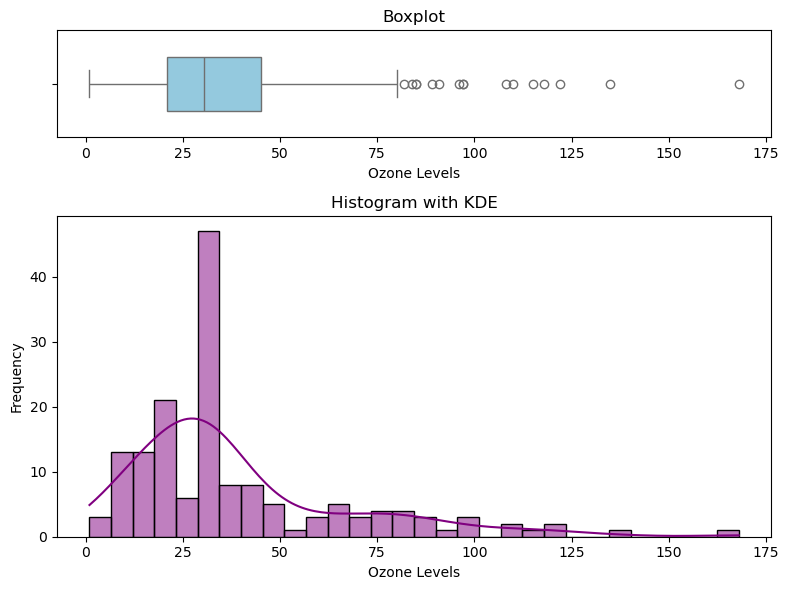

In [28]:
# Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")

# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

# Adjust Layout for better spacing
plt.tight_layout()

#show the plot
plt.show()

# observations
- The ozone column has extreme values beyound 81 as seen from box plot
- The is confirmed from the below right=skewed histogram

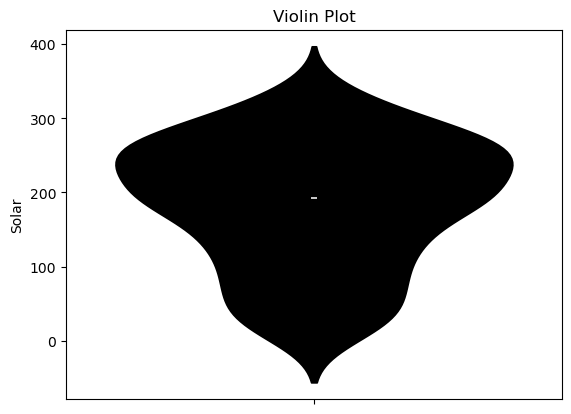

In [30]:
sns.violinplot(data=data1['Solar'],color='black')
plt.title('Violin Plot')
plt.show()

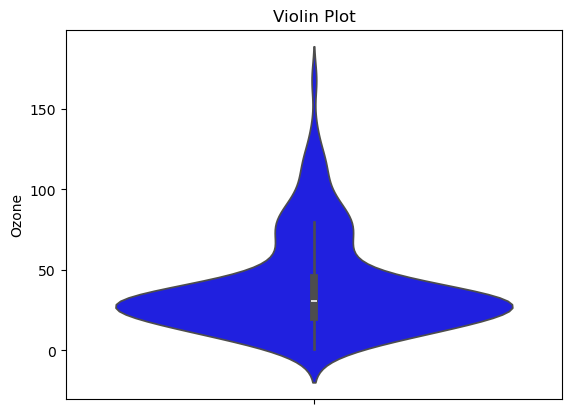

In [31]:
sns.violinplot(data=data1['Ozone'],color='blue')
plt.title('Violin Plot')
plt.show()

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

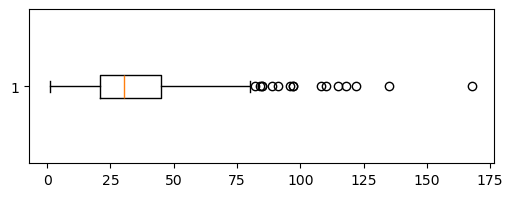

In [32]:
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"], vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

Method 2 

- Using mu +/-3*sigma limits

In [35]:
data1["Ozone"].describe()

count    158.000000
mean      38.917722
std       28.794730
min        1.000000
25%       21.000000
50%       30.500000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [36]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x < (mu + 3*sigma))):
        print(x)

41.0
36.0
12.0
18.0
30.5
28.0
23.0
19.0
8.0
30.5
7.0
16.0
11.0
14.0
18.0
14.0
34.0
6.0
30.0
11.0
1.0
11.0
4.0
32.0
30.5
30.5
30.5
23.0
45.0
115.0
37.0
30.5
30.5
30.5
30.5
30.5
30.5
29.0
30.5
71.0
39.0
30.5
30.5
23.0
30.5
30.5
21.0
37.0
20.0
12.0
13.0
30.5
30.5
30.5
30.5
30.5
30.5
30.5
30.5
30.5
30.5
49.0
32.0
30.5
64.0
40.0
77.0
97.0
97.0
85.0
30.5
10.0
27.0
30.5
7.0
48.0
35.0
61.0
79.0
63.0
16.0
30.5
30.5
80.0
108.0
20.0
52.0
82.0
50.0
64.0
59.0
39.0
9.0
16.0
78.0
35.0
66.0
122.0
89.0
110.0
30.5
30.5
44.0
28.0
65.0
30.5
22.0
59.0
23.0
31.0
44.0
21.0
9.0
30.5
45.0
73.0
30.5
76.0
118.0
84.0
85.0
96.0
78.0
73.0
91.0
47.0
32.0
20.0
23.0
21.0
24.0
44.0
21.0
28.0
9.0
13.0
46.0
18.0
13.0
24.0
16.0
13.0
23.0
36.0
7.0
14.0
30.0
30.5
14.0
18.0
20.0
41.0
30.0
30.5
14.0
18.0


C:\Users\nagas\AppData\Local\Temp\ipykernel_2664\1554847487.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\nagas\AppData\Local\Temp\ipykernel_2664\1554847487.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


Quantile-Quantile plot for detection of outliers

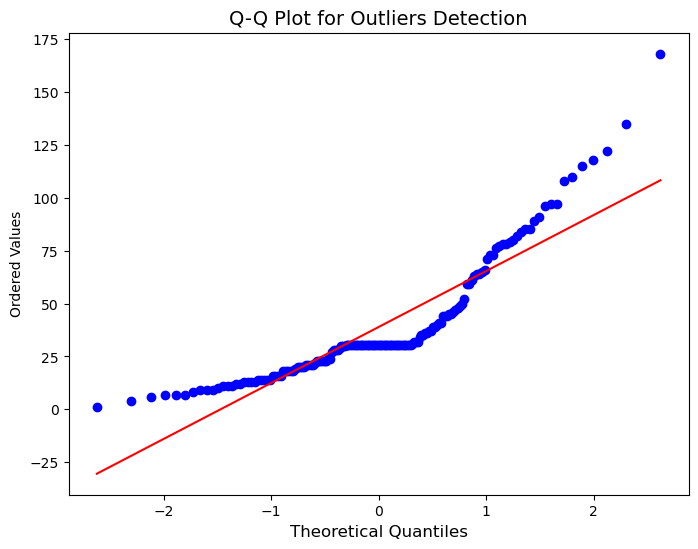

In [38]:
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.figure(figsize=(8,6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outliers Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.show()

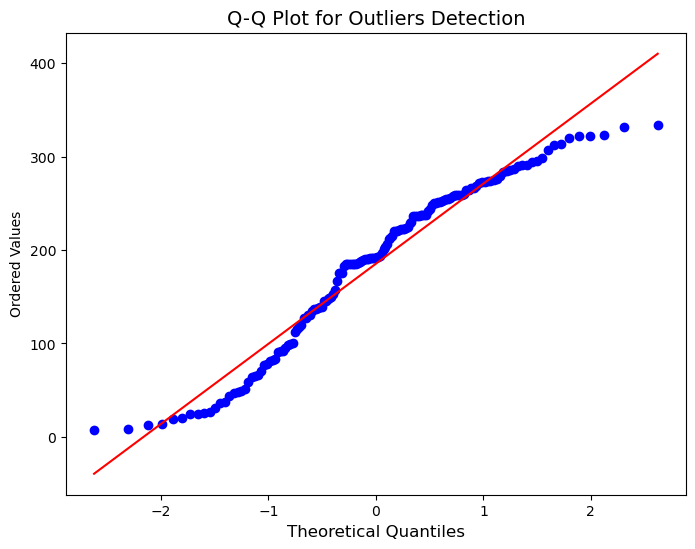

In [39]:
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.figure(figsize=(8,6))
stats.probplot(data1["Solar"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outliers Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.show()

Observations from Q-Q plot

-The data does not follow distribution as the data points are deviating significantly away from the red line          
-The data shows a right-skewedd distribution and possible outliers

Other visualiztion that could help understand the data

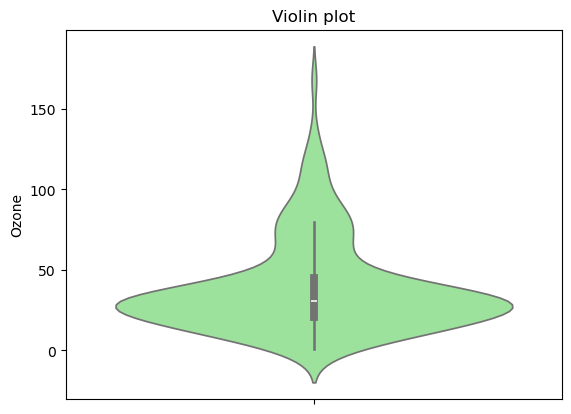

In [74]:
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin plot")

plt.show()

C:\Users\nagas\AppData\Local\Temp\ipykernel_2664\2055402688.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data1, x = "weather",y="Ozone",palette="Set2")


<Axes: xlabel='weather', ylabel='Ozone'>

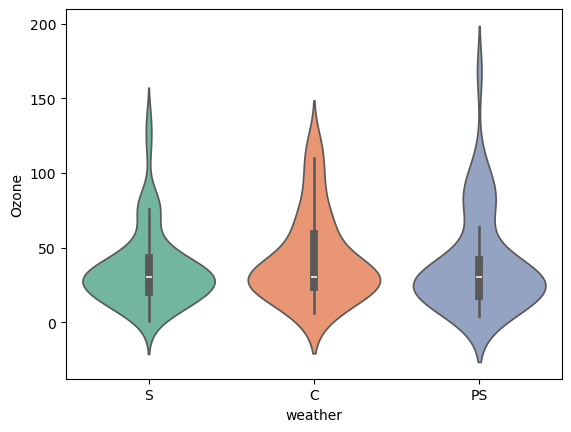

In [76]:
sns.violinplot(data=data1, x = "weather",y="Ozone",palette="Set2")

C:\Users\nagas\AppData\Local\Temp\ipykernel_2664\1222012946.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

C:\Users\nagas\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


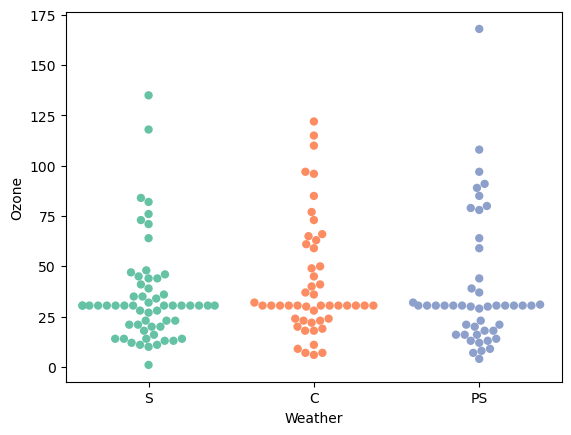

In [78]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)

C:\Users\nagas\AppData\Local\Temp\ipykernel_2664\1231510276.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1, x="Weather", y="Ozone", color="orange", palette="Set3", size=6, jitter=True)


<Axes: xlabel='Weather', ylabel='Ozone'>

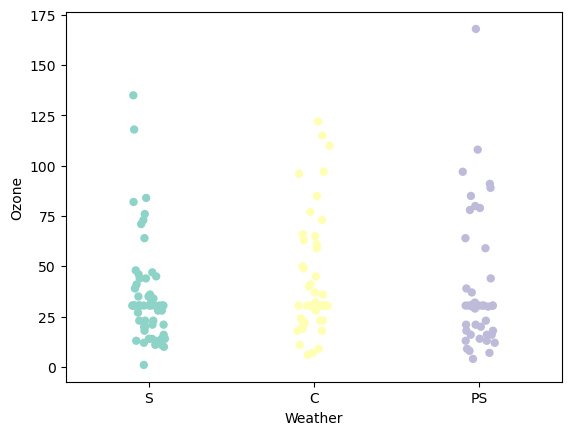

In [86]:
sns.stripplot(data=data1, x="Weather", y="Ozone", color="orange", palette="Set3", size=6, jitter=True)


<Axes: xlabel='Ozone', ylabel='Density'>

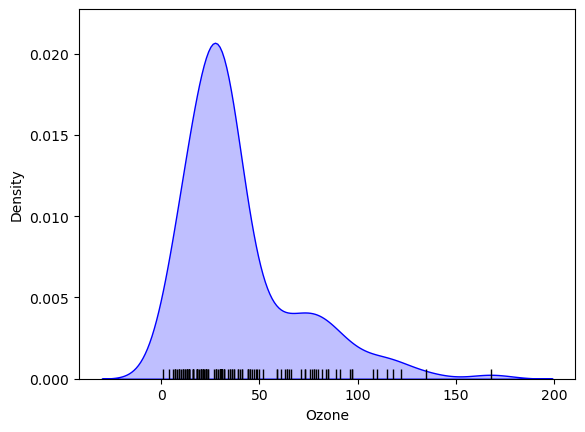

In [92]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")


<Axes: xlabel='Weather', ylabel='Ozone'>

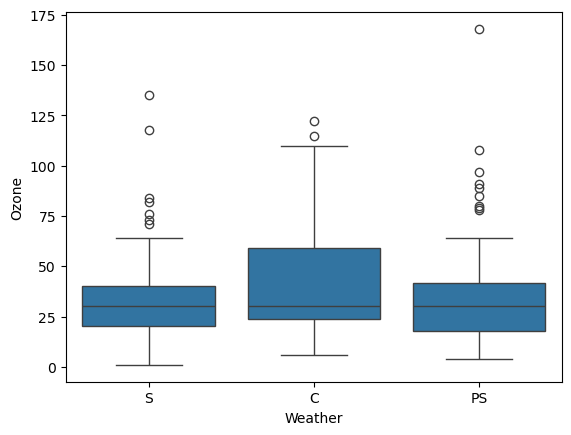

In [95]:
sns.boxplot(data=data1, x = "Weather",y = "Ozone")

correlation coefficient and pair plots

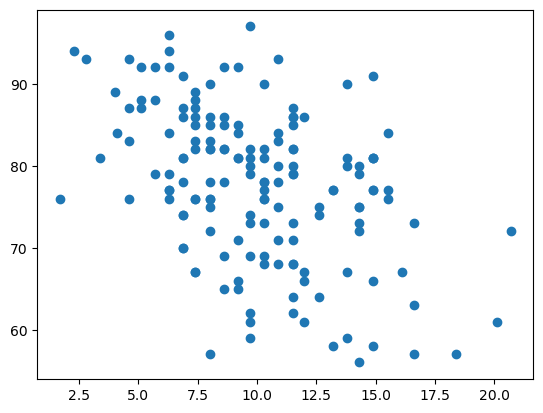

In [98]:
plt.scatter(data1["Wind"], data1["Temp"])

In [100]:
data1["Wind"].corr(data1["Temp"])

-0.441246717631239

In [ ]:
data1_numeric = data1.ilco[:,{}]